# Inteligencia Artificial
## Proyecto Corto 1

Enlace de GitHub: https://github.com/GeraldFMoraMora/IA-Proyecto-Corto

#### Integrantes:

 - Brayan Fajardo Alvarado
 - Fabricio Castillo Alvarado
 - Gerald Mora Mora

# Descenso de la Gradiente Estocástico (Stochastic Gradient Descent)



Es un algoritmo de optimización de primer orden y una variación del algoritmo de descenso de la gradiente (Gradient Descent).

Se utiliza para aprender un conjunto de coeficientes de clasificación para el aprendizaje parametrizado, implementado sobretodo en conjuntos grandes de datos, pues este es más rápido en comparación a otros métodos matemáticos como el método estándar de gradient descent, además de que a su misma vez se evita realizar desperdicios computacionales.




$$ θ:=θ−α∇θJi(θ)$$


- $ θ $ es el valor que genera el SDG después de ejecutarse.
- $ α $ es la tasa de aprendizaje del algoritmo.
- $ ∇θ $ es el gradiente del valor generado (pendiente en un punto dado)



La diferencia que presenta con respecto al método de descenso de la gradiente es que se actualiza la matriz de pesos W en pequeños conjuntos de o arreglos de datos de entrenamiento.

Este algoritmo permite realizar más pasos sobre el gradiente lo cual implica un paso por lote en comparación a un paso por época, lo que permite una convergencia más rápida que no va a afectar la precisión ni la pérdida de la clasificación.

El objetivo de desarrollo de este método es evitar lo que ocurría en grandes conjuntos de datos con el algoritmo de descenso de gradiente, en el que para cada iteración de descenso de gradiente se requiere que se calcule una predicción para cada punto de entrenamiento del conjunto de datos de entrenamiento, esto se traduce a que por el cálculo de predicciones para cada punto se debe realizar la actualización de la matriz de pesos W, lo cual es un desperdicio computacional.

# Ejemplo de Código en Python

El siguiente ejemplo muestra la ejecución del la búsqueda de un punto mínimo en un conjunto de  datos con el algoritmo de Descenso de la Gradiente Estocástico.

* Ratio de Aprendizaje Establecido: 0.01
    
* Cantidad de Desplazamiento (epochs) establecidos: 100
    


In [36]:
import random

El primer paso es desarrollar una función para realizar predicciones.

Es necesaria en la evaluación de los valores del coeficiente del candidato en el descenso del gradiente del estocástico.

La función **predict** predice un valor de salida para una fila dado un conjunto de coeficientes.

In [37]:
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

Por medio de la función **coefficients_sgd(train, l_rate, n_epoch)**, podemos estimar los valores de los coeficientes para los datos de entrenamiento por medio del descendo de gradiente estocástico (SDG).

SDG utiliza 2 parámetros para el cálculo de las funciones:

- l_rate: Indica la taza o el ratio de aprendizaje, con el que se limita la cantidad del número de veces que se ejecutan los datos de entrenamiento mientras se actualizan los coeficientes.

- n_epoch (épocas): El número de veces que se ejecutan los datos de entrenamiento mientras se actualizan los coeficientes.


Los coeficientes se actualizan en función del error cometido por el modelo. El error se calcula como la diferencia entre la predicción hecha con los coeficientes candidatos y el valor de salida esperado.

In [38]:

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef
 


Se realiza la ejecución del algoritmo con un learning rate de 0.010 y una cantidad de 100 epoch's (épocas). Se imprime el grado de error de la aproximación

In [39]:
# Calculate coefficients
dataset = [[random.randint(1,10), random.randint(1,10)], [random.randint(1,10), random.randint(1,10)], [random.randint(1,10), random.randint(1,10)],
           [random.randint(1,10), random.randint(1,10)], [random.randint(1,10), random.randint(1,10)]]
l_rate = 0.01
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.010, error=151.540
>epoch=1, lrate=0.010, error=108.048
>epoch=2, lrate=0.010, error=107.827
>epoch=3, lrate=0.010, error=107.606
>epoch=4, lrate=0.010, error=107.386
>epoch=5, lrate=0.010, error=107.168
>epoch=6, lrate=0.010, error=106.950
>epoch=7, lrate=0.010, error=106.733
>epoch=8, lrate=0.010, error=106.517
>epoch=9, lrate=0.010, error=106.302
>epoch=10, lrate=0.010, error=106.088
>epoch=11, lrate=0.010, error=105.875
>epoch=12, lrate=0.010, error=105.663
>epoch=13, lrate=0.010, error=105.452
>epoch=14, lrate=0.010, error=105.241
>epoch=15, lrate=0.010, error=105.032
>epoch=16, lrate=0.010, error=104.823
>epoch=17, lrate=0.010, error=104.615
>epoch=18, lrate=0.010, error=104.409
>epoch=19, lrate=0.010, error=104.203
>epoch=20, lrate=0.010, error=103.998
>epoch=21, lrate=0.010, error=103.794
>epoch=22, lrate=0.010, error=103.590
>epoch=23, lrate=0.010, error=103.388
>epoch=24, lrate=0.010, error=103.186
>epoch=25, lrate=0.010, error=102.986
>epoch=26, lrate=0.010

#### *Código fuente y resultado de ejecución del algoritmo en Python*



# Ejemplos de gráficos

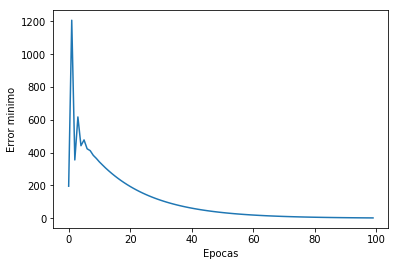

In [40]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Funcion que devuelve el data set de datos para el polinomio seleccionado.
def generar_puntos(polinomio):
	Y=0
	data_set=[]
	cont1=0
	cont2=0
	while cont1< 5:
		X = 2 * np.random.randint(1,10)
		while cont2< len(polinomio):
			Y+=polinomio[cont2][0]*(X**polinomio[cont2][1])
			cont2+=1
		data_set+=[[X,Y]]
		cont1+=1

	return data_set
    
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estima los coeficientes de la linea de regresion usando stochastic gradient descent.
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	lista = []
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		## print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
		lista+=[sum_error]
	return coef, lista


A continuación se mostrarán 2 gráficos que representarán polinomios previamente establecidos, pero con valores aleatorios de X.

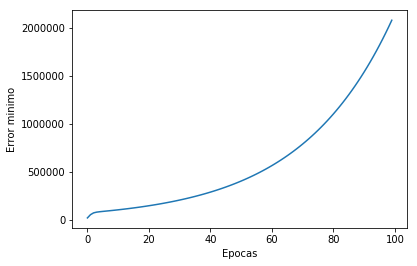

In [42]:
# Se establece la ecuacion del polinomio.
polinomio=[[1,2],[1,1],[4,0]]


dataset = generar_puntos(polinomio)
l_rate = 0.01
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
#print(coef[0])

plt.plot(coef[1])
plt.ylabel('Error minimo')
plt.xlabel('Epocas')
plt.show()

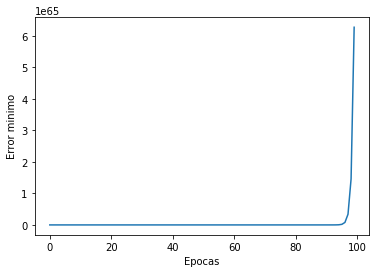

In [41]:
polinomio=[[1,2],[1,1],[4,0]]


dataset = generar_puntos(polinomio)
l_rate = 0.01
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
#print(coef[0])

plt.plot(coef[1])
plt.ylabel('Error minimo')
plt.xlabel('Epocas')
plt.show()

# Referencias Bibliográficas

Anónimo. (2018). Descenso de Gradientes Estocástico "SGD" - ▷ Cursos Python y más desde 0 a Experto 🏆 garantizados. Retrieved from https://www.aprenderpython.net/descenso-gradientes-estocastico-sgd/

Brownlee, J. (2018). How to Implement Linear Regression With Stochastic Gradient Descent From Scratch With Python. Retrieved from https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

Python, I. (2018). Implementation of Stochastic Gradient Descent in Python. Retrieved from https://datascience.stackexchange.com/questions/30786/implementation-of-stochastic-gradient-descent-in-python

Rosebrock, A. (2018). Stochastic Gradient Descent (SGD) with Python - PyImageSearch. Retrieved from https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/

